<a href="https://colab.research.google.com/github/dominiksakic/deeplearning00/blob/main/MultiClassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)


In [23]:
import numpy as np

def vectorize_sequence(sequence, dimension=10000):
  results = np.zeros((len(sequence), dimension))
  for i, sequence in enumerate(sequence):
    for j in sequence:
      results[i, j] = 1.
  return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [24]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [25]:
from keras import models
from keras import layers

model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [46]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9341 - loss: 0.3153 - val_accuracy: 0.9370 - val_loss: 0.3113
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9405 - loss: 0.2632 - val_accuracy: 0.9270 - val_loss: 0.3025
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.9417 - loss: 0.2471 - val_accuracy: 0.9250 - val_loss: 0.3209
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.9513 - loss: 0.2120 - val_accuracy: 0.9250 - val_loss: 0.3165
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.9541 - loss: 0.1893 - val_accuracy: 0.9200 - val_loss: 0.3367
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9588 - loss: 0.1658 - val_accuracy: 0.9190 - val_loss: 0.3466
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9573 - loss: 0.1578 - val_accuracy: 0.9110 - val_loss: 0.3608
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.9586 - loss: 0.1419 - val_accuracy: 0.9160 - 

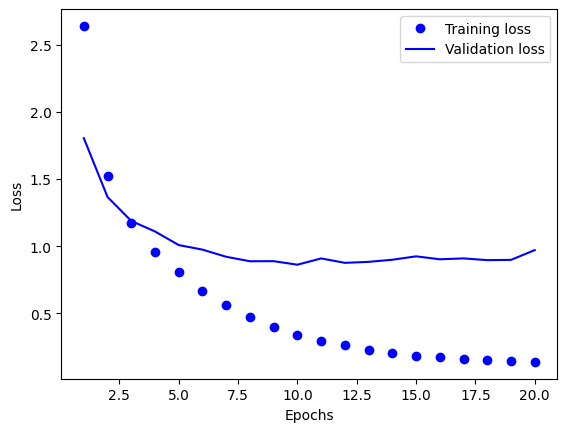

In [30]:
import matplotlib.pyplot as plt


loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

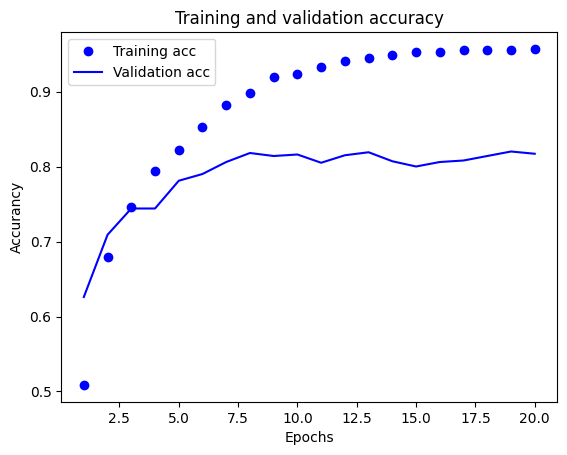

In [32]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accurancy")
plt.legend()
plt.show()

In [33]:
model = models.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer="rmsprop",
  loss="categorical_crossentropy",
  metrics=["accuracy"])

model.fit(x_train,
  y_train,
  epochs=9,
  batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - accuracy: 0.4304 - loss: 3.0724
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6779 - loss: 1.5428
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7315 - loss: 1.1798
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7913 - loss: 0.9318
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8309 - loss: 0.7771
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.8635 - loss: 0.6418
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8883 - loss: 0.5162
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9068 - loss: 0.4437
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9198 - loss: 0.3789
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8046 - loss: 0.8885


In [36]:
results

[0.910980224609375, 0.7978628873825073]

In [45]:
predictions = model.predict(x_test)
np.argmax(predictions[0])

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


3